<a href="https://colab.research.google.com/github/CarolineGuothesweetie/BA780-Lecture-Notes/blob/main/02_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization with Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools and is starting to handle Pandas data more seamlessly.

The newer releases of the library include a default stylesheet that has improved on the visualization. But for all the reasons just discussed, Seaborn remains an extremely useful addon.

In [1]:
import seaborn
seaborn.__version__

'0.11.1'

In [2]:
from IPython.display import Pretty as disp
hint = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/docs/hints/'  # path to hints on GitHub

import matplotlib.pyplot as plt
#plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})  # Figure size

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

## Visualizing statistical **rel**ationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### Relating variables with scatter plots

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the `scatterplot()` function.

Let's first load some data from Seaborn's available datasets:

In [4]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


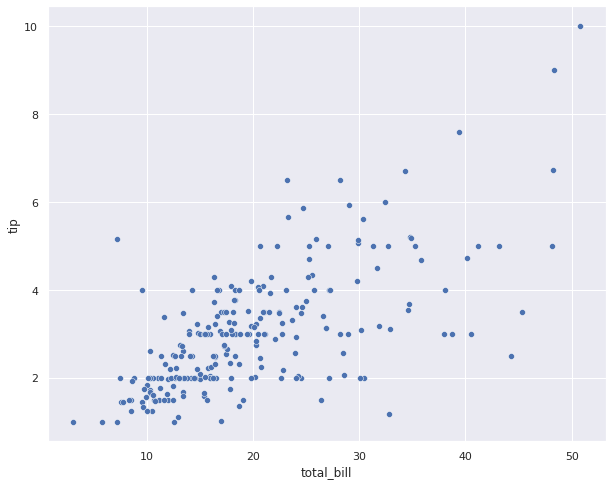

In [6]:
sns.scatterplot(x="total_bill", y="tip", data=tips);

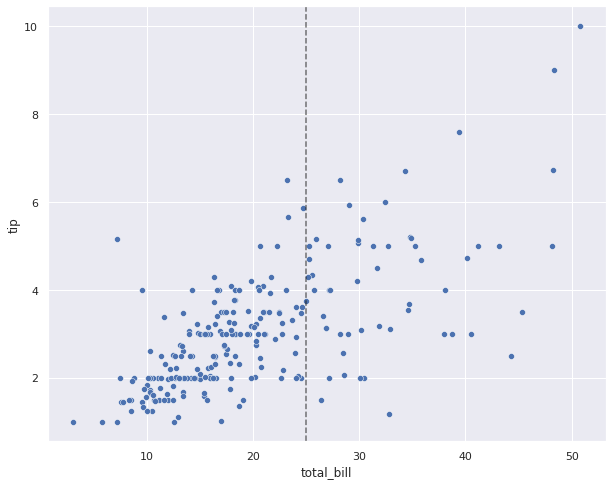

In [10]:
sns.scatterplot(x="total_bill", y="tip", data=tips);
plt.axvline(25, color="k", linestyle="--", alpha=0.6);

**Note:** We have combined a *plt* plot with an *sns* one. But in reality they both are Matplotlib plots.

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

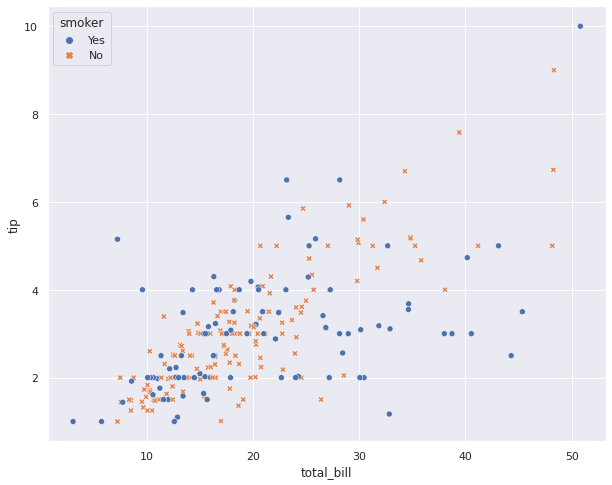

In [12]:
sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

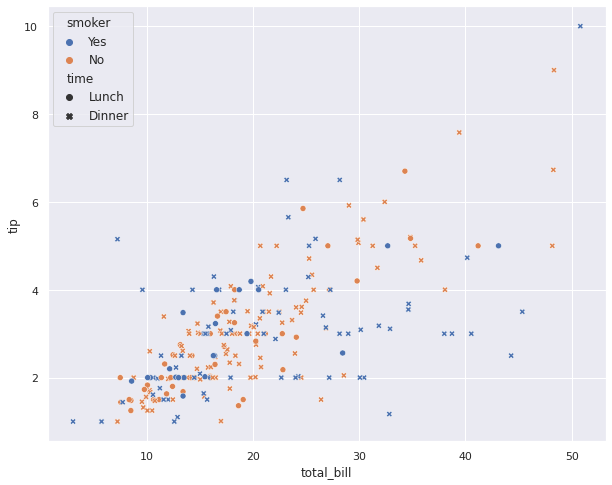

In [13]:
sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

### Showing multiple relationships with facets

We can repeat the previous plots by using `relplot()` to get even more functionality such as a FacetGrid. `relplot()` can be used for scatter and line plots but the default kind is `kind='scatter'`.

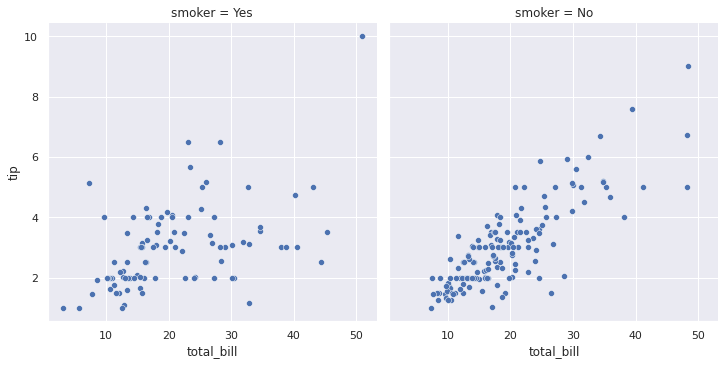

In [17]:
sns.relplot(x="total_bill", y="tip", col="smoker", data=tips);

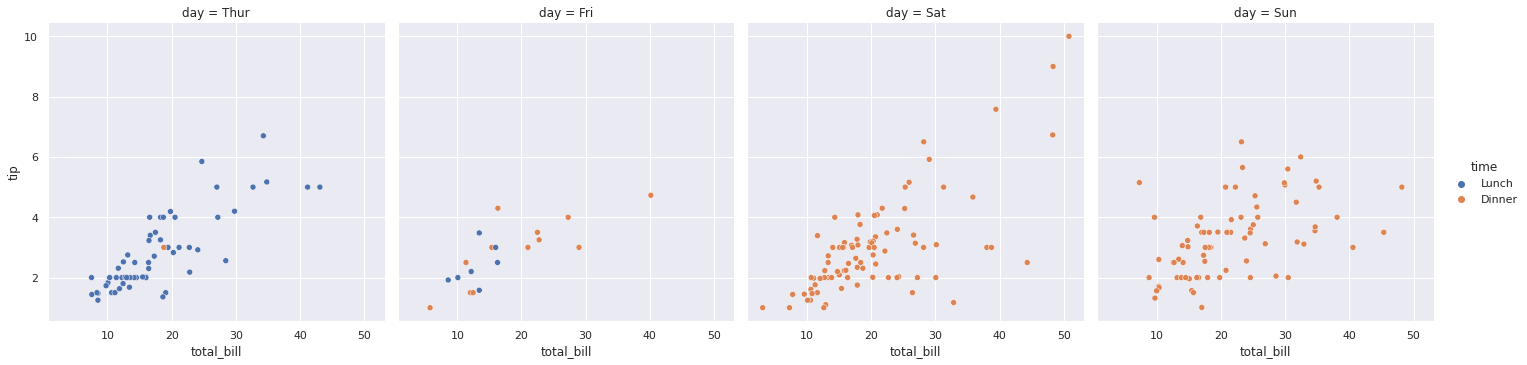

In [16]:
sns.relplot(x="total_bill", y="tip", hue="time", col="day", data=tips);

For more examples of `relplot()` visit [Seaborn tutorial: Visualizing statistical **rel**ationships](https://seaborn.pydata.org/tutorial/relational.html).

## Plotting with categorical data

If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between `relplot()` and either `scatterplot()` or `lineplot()`, there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, `catplot()`, that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

Categorical scatterplots:

* `stripplot()` (with kind="strip"; the default)
* `swarmplot()` (with kind="swarm")

Categorical distribution plots:

* `boxplot()` (with kind="box")
* `violinplot()` (with kind="violin")

Categorical estimate plots:

* `pointplot()` (with kind="point")
* `barplot()` (with kind="bar")
* `countplot()` (with kind="count")

Here we’ll mostly focus on the figure-level interface, `catplot()`. Remember that this function is a higher-level interface each of the functions above, so we’ll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

### Categorical scatterplots

The default representation of the data in `catplot()` uses a scatterplot (kind='strip').

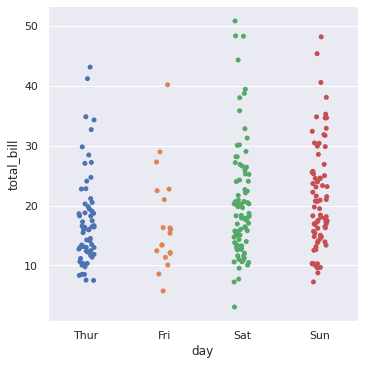

In [18]:
sns.catplot(x="day", y="total_bill", data=tips);

Change the order:

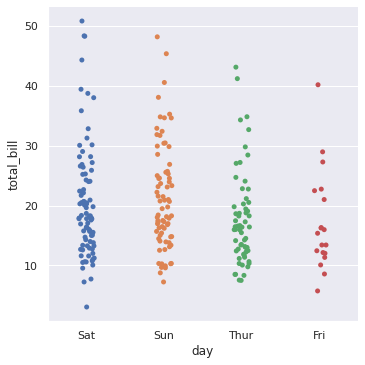

In [ ]:
sns.catplot(x="day", y="total_bill", data=tips, order=['Sat','Sun','Thur','Fri']);

With **jitter** off:

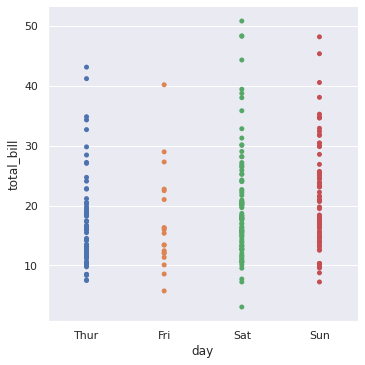

In [ ]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

**Swarm plots:** adjusts the points along the categorical axis using an algorithm that prevents them from overlapping.

### Your turn

Set kind="swarm" to plot a swarm plot. Can you also set the "height" to a larger value? What else do you need to change to obtain the chart below?

In [ ]:
# Your answer goes here


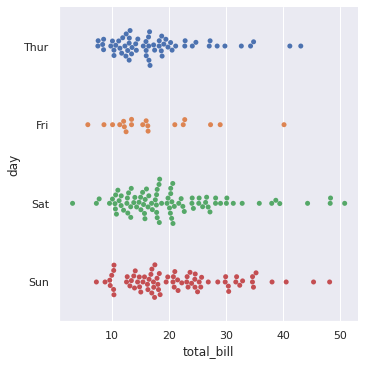

In [ ]:
# Don't run this cell to keep the outcome as your frame of reference


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-swarm')

### Boxplots



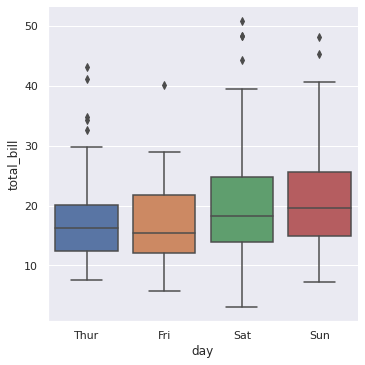

In [19]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

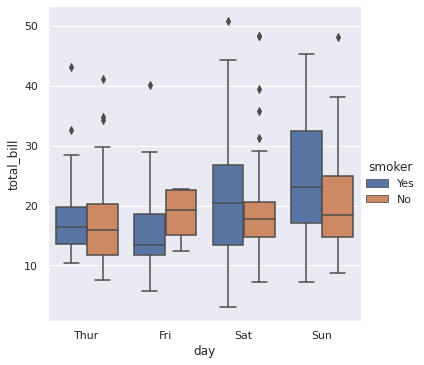

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

Showing multiple relationships with facets by adding *col* or *row*:

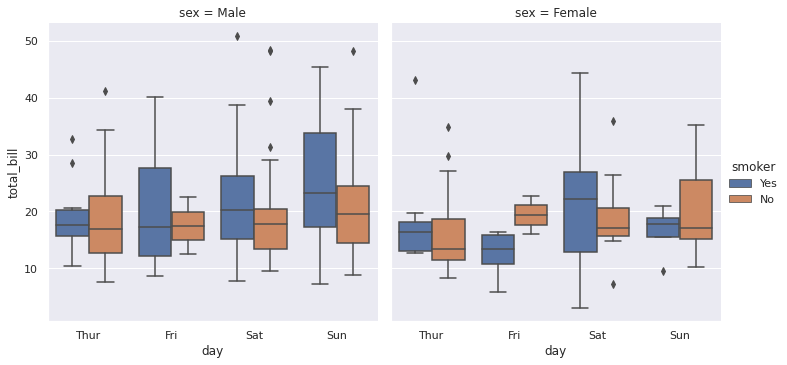

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", col='sex', kind="box", data=tips);

### Your turn

Can you reproduce the following plot?

In [ ]:
# Your answer goes here


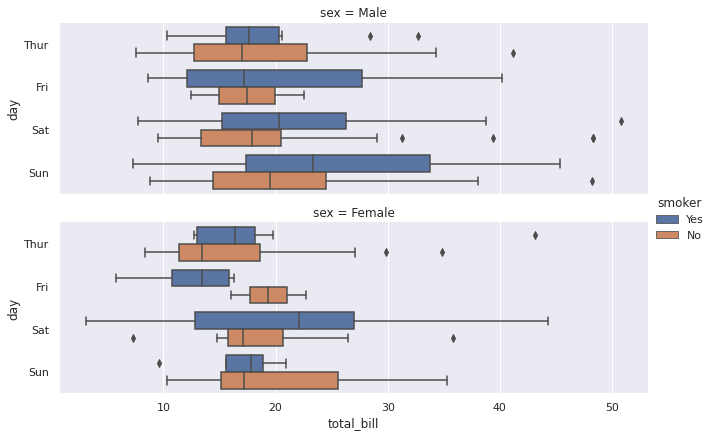

In [ ]:
# Don't run this cell to keep the outcome as your frame of reference

In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '09-02-box')

### Violinplots

combines a boxplot with the kernel density estimation:

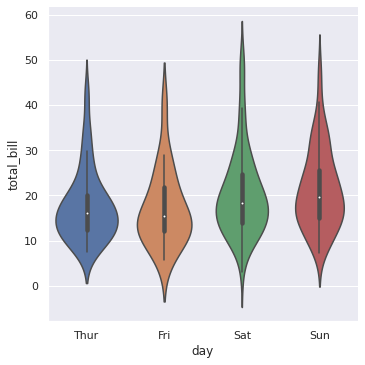

In [20]:
sns.catplot(y="total_bill", x="day", kind="violin", data=tips);

`cut` is used to extend the density past the extreme datapoints. Set to 0 to limit the violin range within the range of the observed data:

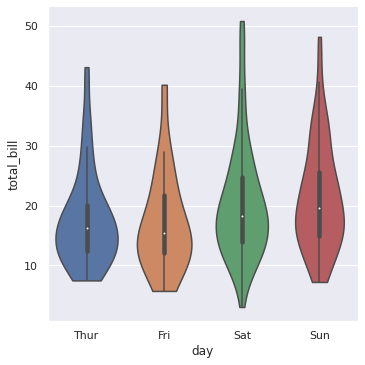

In [21]:
#cut=0 canceled the strentched tail of the vilion tail;
sns.catplot(y="total_bill", x="day", kind="violin", cut=0, data=tips);

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space. Note that in the plot below we have also used a inner="stick":

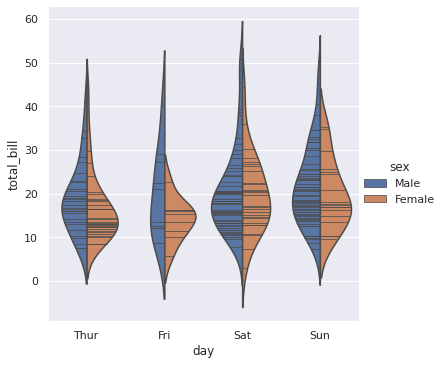

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, inner="stick", data=tips);

In order to get access to more specific arguments related to violinplots read the help document: `sns.violinplot?`

### Bar plots

In seaborn, the `barplot()` function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

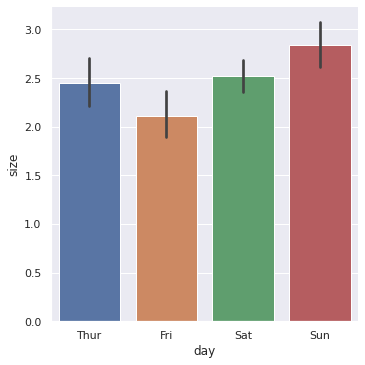

In [ ]:
sns.catplot(x="day", y="size", kind="bar", data=tips);

### `countplot()`

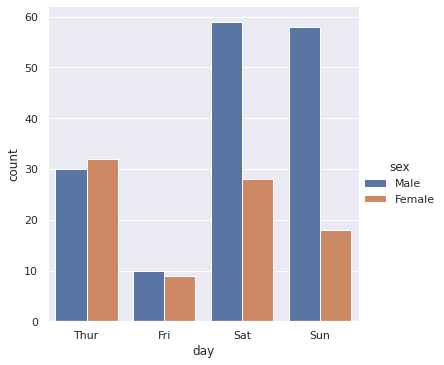

In [ ]:
sns.catplot(x="day", kind="count", hue='sex', data=tips);

For more examples of `catplot()` visit [Seaborn tutorial: Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html).

## Visualizing the distribution of a dataset

### Plotting univariate distributions

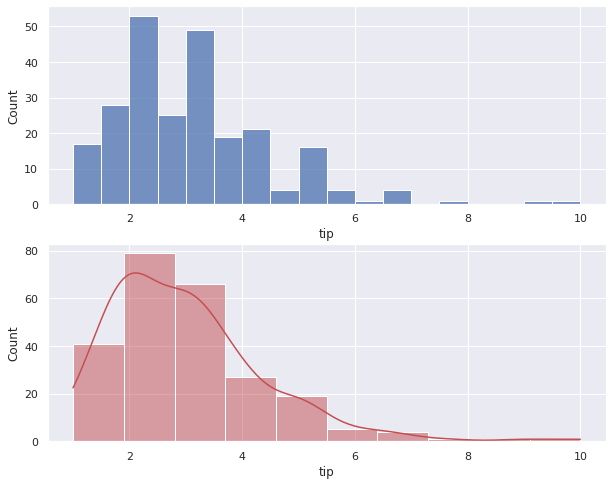

In [ ]:
fig, ax = plt.subplots(2,1)

sns.histplot(tips['tip'], ax=ax[0]);
sns.histplot(tips['tip'], kde=True, bins=10, color='r', ax=ax[1]);

### Plotting bivariate distributions



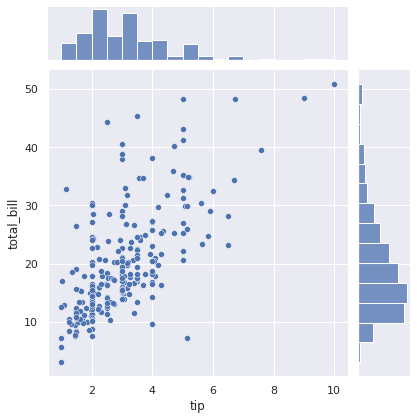

In [ ]:
sns.jointplot(x="tip", y="total_bill", data=tips);

### Visualizing pairwise relationships in a dataset

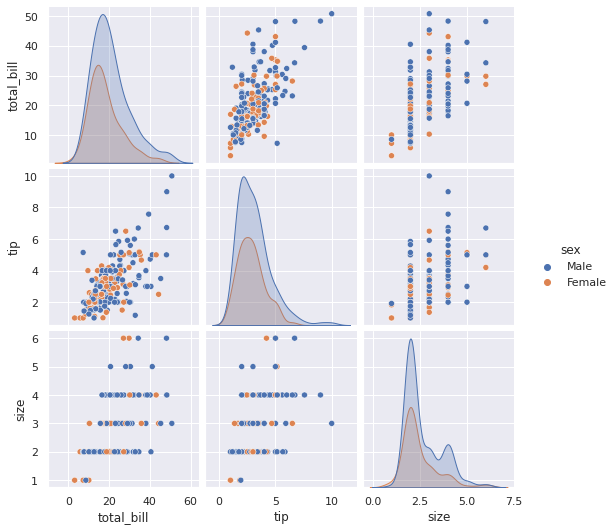

In [22]:
sns.pairplot(tips, hue='sex');

For more examples of this kind visit [Seaborn tutorial: Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html).

## Visualizing linear relationships

### Functions to draw linear regression models

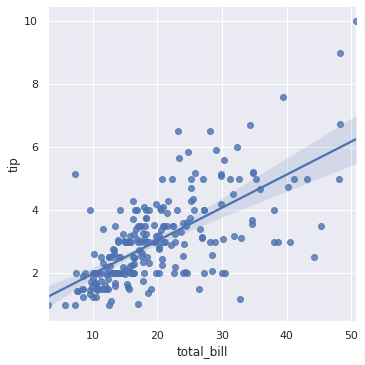

In [23]:
sns.lmplot(x="total_bill", y="tip", data=tips);

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

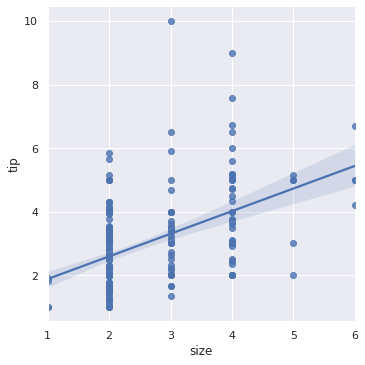

In [ ]:
sns.lmplot(x="size", y="tip", data=tips);

We can collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

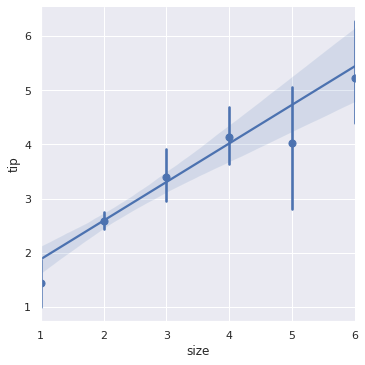

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### Fitting different kinds of models

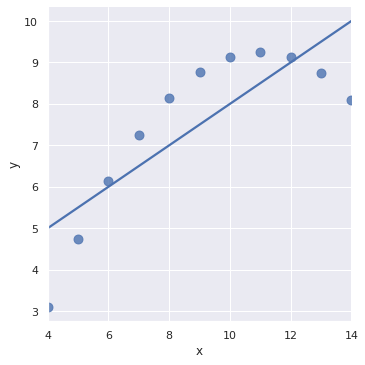

In [ ]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={"s": 80});

In the presence of these kind of higher-order relationships, `lmplot()` and `regplot()` can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

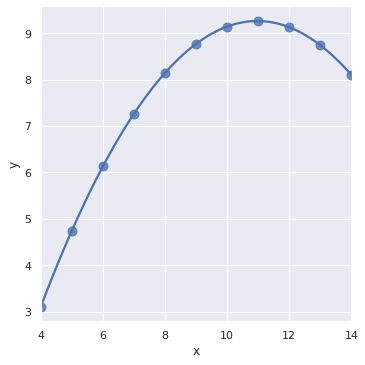

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 80});

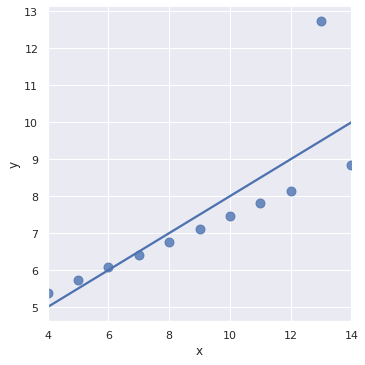

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), ci=None, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


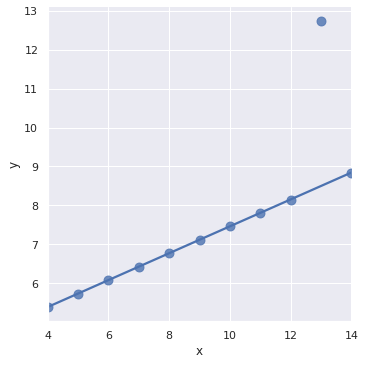

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80});

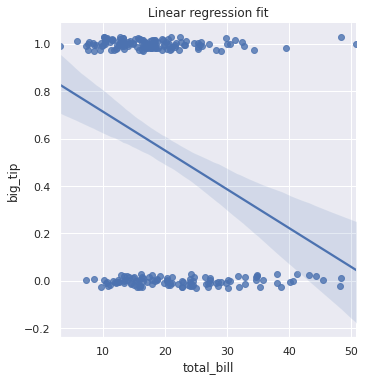

In [ ]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.03);
plt.title('Linear regression fit');

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

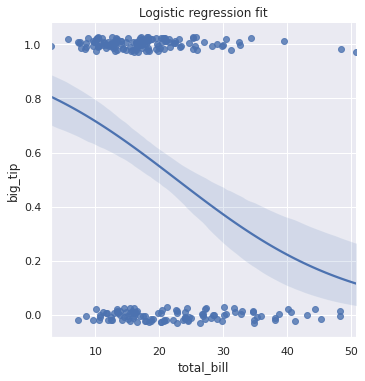

In [ ]:
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03);
plt.title('Logistic regression fit');

For more examples of `regplot()` and `lmplot()` visit [Seaborn tutorial: Visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html).

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

## Further Reading

* [Official Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
    * [Seaborn tutorial: Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)
    * [Seaborn tutorial: Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html)
    * [Seaborn tutorial: Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)
    * [Seaborn tutorial: Visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html)
    * [Building structured multi-plot grids](https://seaborn.pydata.org/tutorial/axis_grids.html)
    * [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)
    * [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

* [Seaborn gallery](http://seaborn.pydata.org/examples/index.html)
    
* [Python Data Science Handbook: Visualization with Seaborn](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.14-Visualization-With-Seaborn.ipynb)


## Other Python Graphics Libraries

Although Matplotlib is the most prominent Python visualization library, there are other more modern tools that are worth exploring as well.
I'll mention a few of them briefly here:

- [Bokeh](http://bokeh.pydata.org) is a visualization library with a Python frontend that creates highly interactive visualizations capable of handling very large and/or streaming datasets. The Python front-end outputs a JSON data structure that can be interpreted by the Bokeh JS engine. 
    - Check out these [live tutorial notebooks](https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb).
- [Plotly](http://plot.ly) is the eponymous open source product of the Plotly company, and is similar in spirit to Bokeh. Because Plotly is the main product of a startup, it is receiving a high level of development effort. Use of the library is entirely free.
- [Vispy](http://vispy.org/) is an actively developed project focused on dynamic visualizations of very large datasets. Because it is built to target OpenGL and make use of efficient graphics processors in your computer, it is able to render some quite large and stunning visualizations.
- [Vega](https://vega.github.io/) and [Vega-Lite](https://vega.github.io/vega-lite) are declarative graphics representations, and are the product of years of research into the fundamental language of data visualization. The reference rendering implementation is JavaScript, but the API is language agnostic. There is a Python API under development in the [Altair](https://altair-viz.github.io/) package. Though as of summer 2016 it's not yet fully mature, I'm quite excited for the possibilities of this project to provide a common reference point for visualization in Python and other languages.

The visualization space in the Python community is very dynamic, and I fully expect this list to be out of date as soon as it is published.
Keep an eye out for what's coming in the future!

### An Example of Plotly Express

More examples can be found [here](https://plotly.com/python/plotly-express/).

In [ ]:
# Install and import the package
!pip install plotly_express -q
import plotly_express as px

In [ ]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [ ]:
df = px.data.gapminder()
fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])
fig.show()